<a href="https://colab.research.google.com/github/HusseinIssaOp/SeniorProjectISD/blob/main/Microsoft_Linear_KNN_Rf_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files


uploaded = files.upload()
la = list(uploaded.keys())[0]

Saving MSFT.csv to MSFT (1).csv


In [ ]:
df = pd.read_csv(la)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9470,2023-10-10,330.959991,331.100006,327.670013,328.390015,328.390015,20557100
9471,2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200
9472,2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100
9473,2023-10-13,332.380005,333.829987,326.359985,327.730011,327.730011,21072400


In [ ]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  9475
Total number of fields present in the dataset:  7


In [ ]:
df.shape

(9475, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000,9.475000e+03
mean,51.226154,51.776328,50.667080,51.239662,45.797426,5.749370e+07
std,75.772256,76.551560,74.965480,75.792902,75.856323,3.818734e+07
min,0.088542,0.092014,0.088542,0.090278,0.056083,2.304000e+06
25%,5.488281,5.570312,5.398438,5.468750,3.397308,3.320300e+07
50%,27.150000,27.430000,26.930000,27.180000,19.090286,5.065350e+07
75%,44.875000,45.260000,44.250000,44.855000,35.163044,7.134750e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,1.031789e+09


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df


,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800,13,3,1986
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000,14,3,1986
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200,17,3,1986
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400,18,3,1986
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400,19,3,1986
...,...,...,...,...,...,...,...,...,...,...
9470,2023-10-10,330.959991,331.100006,327.670013,328.390015,328.390015,20557100,10,10,2023
9471,2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200,11,10,2023
9472,2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100,12,10,2023
9473,2023-10-13,332.380005,333.829987,326.359985,327.730011,327.730011,21072400,13,10,2023


In [ ]:
selected_features = ['Open', 'High', 'Low', 'Close', 'Day', 'Month', 'Year']

selected_data = df[selected_features]

print("Selected Data:")
print(selected_data.head())

Selected Data:
       Open      High       Low     Close  Day  Month  Year
0  0.088542  0.101563  0.088542  0.097222   13      3  1986
1  0.097222  0.102431  0.097222  0.100694   14      3  1986
2  0.100694  0.103299  0.100694  0.102431   17      3  1986
3  0.102431  0.103299  0.098958  0.099826   18      3  1986
4  0.099826  0.100694  0.097222  0.098090   19      3  1986


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_to_scale = ['Open', 'High', 'Low', 'Close', 'Day', 'Month', 'Year']

scaled_features = scaler.fit_transform(selected_data[features_to_scale])

scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale, index=selected_data.index)
scaled_data['Close'] = selected_data['Close']

print("Scaled Data:")
print(scaled_data.tail())


Scaled Data:
          Open      High       Low       Close       Day     Month  Year
9470  0.914865  0.902697  0.929701  328.390015  0.300000  0.818182   1.0
9471  0.915556  0.907387  0.933873  332.420013  0.333333  0.818182   1.0
9472  0.913787  0.909596  0.932681  331.160004  0.366667  0.818182   1.0
9473  0.918791  0.910142  0.925983  327.730011  0.400000  0.818182   1.0
9474  0.915114  0.916441  0.938016  332.640015  0.500000  0.818182   1.0


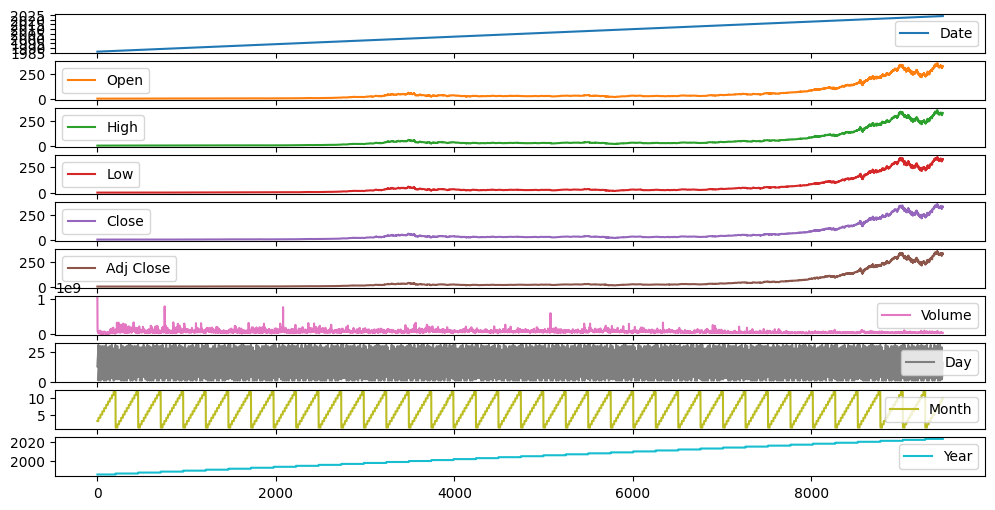

In [ ]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = selected_data.drop('Close', axis=1)
y = selected_data['Close']

In [ ]:
random_seed = 42  #it reset 42 times to split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)

Training set shape (X): (7580, 6)
Testing set shape (X): (1895, 6)
Training set shape (y): (7580,)
Testing set shape (y): (1895,)


In [ ]:
from sklearn.linear_model import LinearRegression    # linear regression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.32369553168809584
R-squared: 0.9999423017793159


In [ ]:
from sklearn.ensemble import RandomForestRegressor          # eandom forest regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 0.6668493285517577
Random Forest - R-squared: 0.9998811351533918


In [ ]:
from sklearn.neighbors import KNeighborsRegressor     #knn regressor
from sklearn.metrics import mean_squared_error, r2_score


knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) - Mean Squared Error:", mse_knn)
print("K-Nearest Neighbors (KNN) - R-squared:", r2_knn)

K-Nearest Neighbors (KNN) - Mean Squared Error: 1.0493965852614928
K-Nearest Neighbors (KNN) - R-squared: 0.9998129467050537


In [ ]:
# on linear regression prediction


new_data = {'Open': [330.959991], 'High': [331.100006], 'Low': [327.670013], 'Day': [17], 'Month': [10], 'Year': [2023]}

new_data_df = pd.DataFrame(new_data)

predicted_close_price = model.predict(new_data_df)

print("Predicted Close Price:", predicted_close_price[0])

Predicted Close Price: 328.59896064353546
